## Self Organizing Map

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset =  pd.read_csv(r"D:\freelance posters and projects\Udemy deep learning course\Self_Organizing_Maps\Credit_Card_Applications.csv")

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Here the columns of importance are:

* The customerID (for verifying the fraudulent customers in the ending)

* Columns A1 to A14 (for feeding the algorithm some data to find a pattern)

* Column Class which mentions whether the application was approved or not

__[More can be found out here](http://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval))__

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Since the variables are all in different ranges, it makes more sense to normalize all these variables to a value between 0 & 1 
which can be done using the MinMaxScaler feature of the scikit learn library

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

To understand how to run the MiniSOM library, go through the doumentation [here](https://github.com/JustGlowing/minisom)

In [6]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

***

**The trained SOM can now be visualised to pinpoint the predicted frauds**

* The circles mean that those applications were not approved ( _class value was 0_ )
* The squares mean that those applications were approved ( _class value was 1_ )
* The color of the background box represents the potential outliers i.e the values that the algorithm detected to be frauds. Basically we consider only the extremely white values which correspond to a value of 1

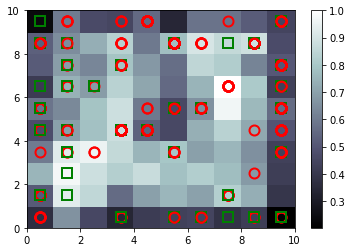

In [7]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone() #gives you a white map
pcolor(som.distance_map().T) #assigning colors to mean interneuron distances
colorbar()
markers = ['o', 's'] #circle and square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, # because we want to keep the marker at center of the box
         w[1] + 0.5,
         markers[y[i]], # to correspond squares with approved and circle with not approved
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()



Now that it is visible which are the outliers in the SOM, we gather the customerID of these outliers by inversing the results. 

_Note_ : Each time we run the SOM, there will be different values pointed by the map. So when running this step, kindly hardcode the coordinates of the outliers

In [9]:
# Finding the frauds
frauds=[]
mappings = som.win_map(X) # gets the mapping of all blocks on the SOM in the form of block coordinates and the people associated with it
frauds = np.concatenate((mappings[(7,6)], mappings[(1,2)]), axis = 0) # this is hardcoding, and will differ in each case to get the number of potential frauds 
frauds_final = sc.inverse_transform(frauds)

***

Given below is the list of potential fraudulent customers as predicted by the algorithm. Since this is a type of unsupervised learning algorithm, there is no way to verify the results except experiencing a fraud.

In [10]:
pd.DataFrame(data=np.int_(frauds_final), columns=['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14'])

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15813718,1,42,1,2,7,4,13,0,1,1,1,2,352,113
1,15815271,1,27,3,1,11,8,5,0,1,2,1,2,369,2
2,15744273,1,22,0,2,3,4,1,0,1,1,1,2,400,10
3,15773934,1,32,2,2,6,4,1,0,1,2,1,2,720,1
4,15570990,1,29,1,2,8,8,0,0,1,2,1,2,400,109
5,15694237,1,29,4,2,7,4,2,0,1,1,1,2,460,69
6,15805627,1,27,1,2,9,4,2,0,1,1,1,2,100,4
7,15692718,1,22,12,2,8,4,3,0,1,2,1,2,180,174
8,15789865,1,18,2,2,8,7,0,0,1,2,1,2,160,588
9,15618703,1,25,3,2,8,8,2,0,1,1,1,2,416,22
